# Data Visualization and Exploratory Data Analysis

The following is a selection of data visualization tools for exploratory data analysis (EDA) that use the wine quality data set (citations below) for examples.

EDA is a critical step towards understanding how the features in your data relate to one another, if at all. Additionally, if your goal is to apply machine learning techniques to predict a label, EDA will help identify features that may be useful for making those predictions. Finally, EDA can help highlight features that are redundant.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
# Import data
white = pd.read_csv('./Data/winequality-white.csv', delimiter=';')
red = pd.read_csv('./Data/winequality-red.csv', delimiter=';')

# Add categorical column for type of wine
white['type'] = ['white'] * white.shape[0]
red['type'] = ['red'] * red.shape[0]

# Combine red and white dataframes into one
wine = pd.concat([white, red], ignore_index=True)
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,red


In [4]:
wine.shape

(6497, 13)

## Summary Statistics

A good first look into a set of data is to check for data types (using the `info()` method) and to run summary statistics (using the `describe()` method). A quick look over the data type output can show if any feature has missing values, or if any variables were imported as the wrong type. For example, a variable that should be numeric is coded as an `object` (aka a string).

Summary statistics show a block of numbers - usually easier to digest in the form of visualizations - but they can give you a sense of each numeric variable's central tendency (mean and median), spread (standard deviation and several percentile values), and range (minimum and maximum).

For the one categorical feature in this set, running the `value_counts()` method on the `type` column will show the number of observations for each category. This is useful to see what you're working with as well as to identify potential issues if you're goal is to run the data through a machine learning model. You'll see if there are imbalanced classes for a classification problem, or sparse classes that may contribute to model overfitting.

The wine quality data seem to have several variables with potential outliers - high maximum values compared to the mean, spread, and 75th percentile numbers. Also, one step to consider in the data cleaning phase would be to convert the `type` variable (whether the wine is red or white) from type `object` to type `category` to save memory. While that's not critical for a data set of this size, it can help with larger data sets. The value counts for the `type` of wine also show that there are three times an many white wine observations in the set than red wine ones.

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
wine['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

## Visualizing Feature Distributions

An important part of exploratory data analysis is understanding the distributions of each feature - is it normal? Uniform? Skewed in either direction? Are there unexpected values or spikes in the data? A visualization can help identify features that should be binary (an indicator variable), sparse data, potential outliers, measurement errors, and boundaries that may not make sense.

For numeric features, **histograms** are a useful tool to visualize how the data are distributed. For categorical features, Seaborn's `countplot()` function shows counts per category, which is helpful to see if there are any sparse classes, spelling errors, or similar categories that should be combined.

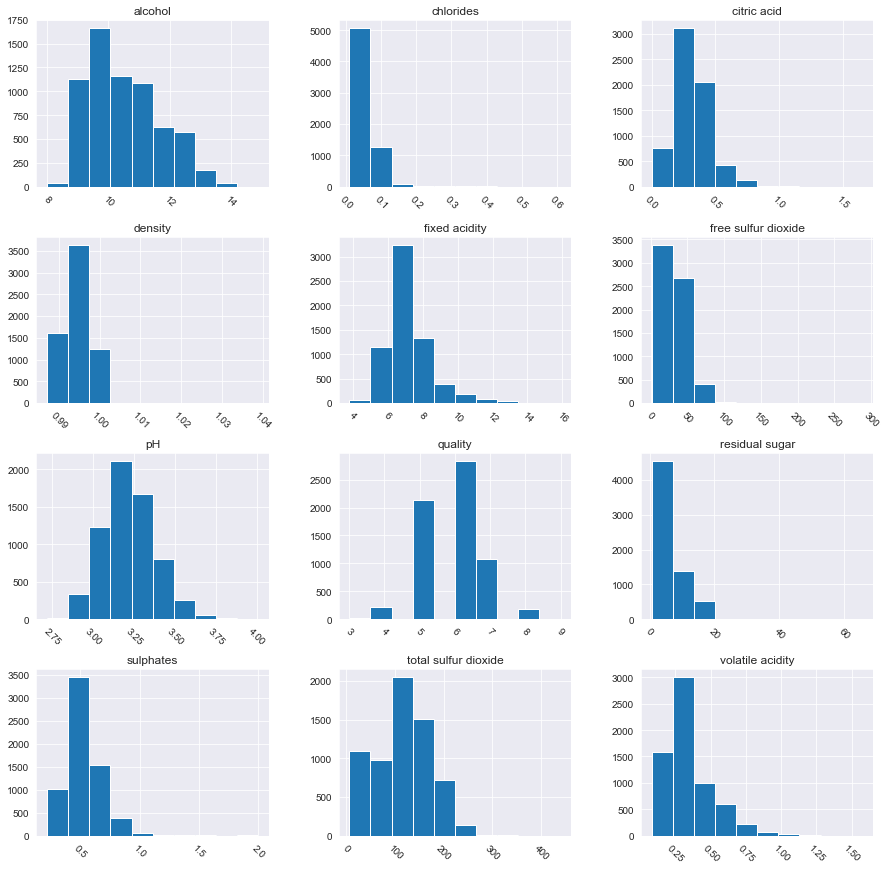

In [8]:
wine.hist(figsize=(15, 15), xrot=-45);

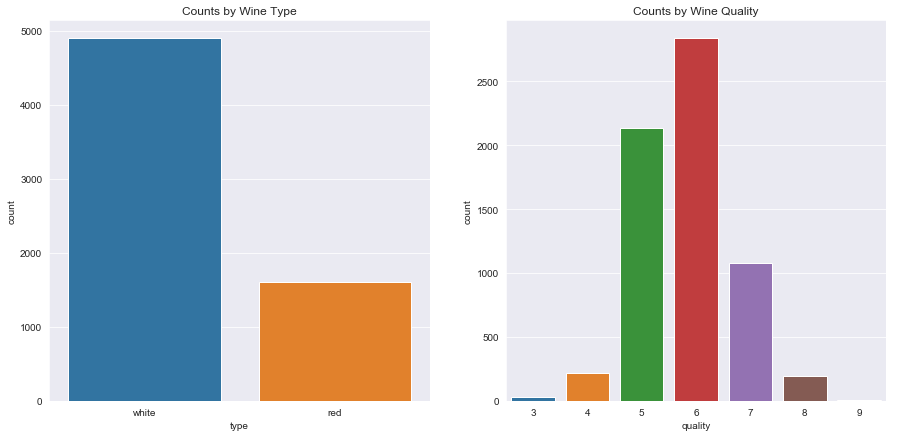

In [44]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
sns.countplot(wine['type']);
plt.title('Counts by Wine Type');
plt.subplot(122)
sns.countplot(wine['quality']);
plt.title('Counts by Wine Quality');

Bar plots display the counts of unique values of a categorical variable. While the Quality feature is numeric, it's really an ordinal categorical variable that has already been coded as a number and is appropriate to show as a bar plot by counts than as a histogram above.

The bar plot for wine types shows the difference between red and white wine observations - certainly a consideration if your goal is to predict that as a classification task. Similarly, the dataset has little representation in the quality variable of very bad or very good wines.

## Distributions to Show Summary Statistics and to Identify Outliers

Identifying whether any features have outliers is also important - they may indicate measurement errors, that an observation isn't relevant to the population that you're studying, or an observation isn't relevant to the problem you're trying to solve.

While histograms may indicate outliers, **box plots** and **violin plots** will show them in more detail. These plots also nicely summarize some key data distribution statistics mentioned earlier.

The box part of a box plot is the middle 50% of the data from Q1 to Q3, or the 25th-75th percentiles, otherwise known as the **interquartile range (IQR)**. The **median** is marked with a line. The whiskers are the less extreme of the minimum versus $\text{Q1} - 1.5\times \text{IQR}$, or likewise the maximum value versus $\text{Q3} + 1.5\times \text{IQR}$. Outliers are marked as dots extending past the whiskers.

Violin plots show the same metrics as box plots, but instead of a box shape, they have a rotated kernel density function of the data to illustrate its distribution.

Both plot types support **segmenting**, where you can display individual plots for each value within a categorical or discrete numeric feature. This is useful to see if any variable distribution is different when split by a category, or to look at a target variable (for machine learning tasks) segmented by a feature.

The **beeswarm plot** is also worth noting here. It's another option to show the distribution of data within a feature by plotting each data point, and it supports segmenting. The exact plots you use and what fits best for the job will vary depending on your data and use case.

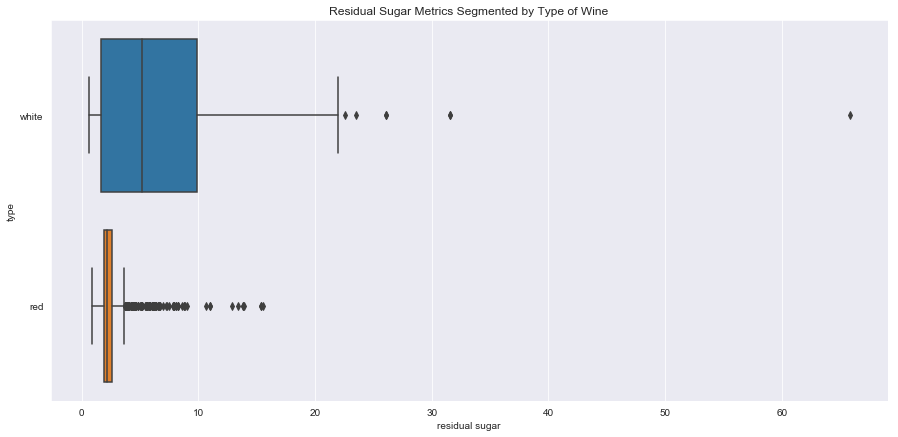

In [35]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=wine, x='residual sugar', y='type');
plt.title('Residual Sugar Metrics Segmented by Type of Wine');

The above box plots show differences between wine type and residual sugars. Not surprisingly, white wine tends to have higher residual sugar measurements than red wine. It also seems to have much more variability within those measurements compared to the red wine samples.

The plots also show a substantial number of outliers in the red wine category for the residual sugar feature. The white wine box plot has a suspicious outlier more than twice as much as the next point down (which is itself an outlier) - that would be an observation worth looking into as a potential measurement error. Outliers are innocent until proven guilty, though, and there must be good reason to remove a suspect data point from the set.

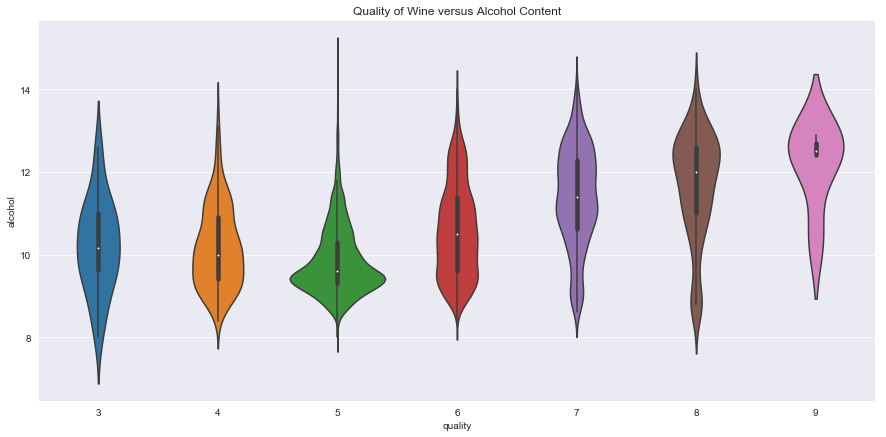

In [34]:
plt.figure(figsize=(15, 7))
sns.violinplot(data=wine, x='quality', y='alcohol');
plt.title('Quality of Wine versus Alcohol Content');

Hmmm, these violin plots seem to indicate a trend where the higher the alcohol content in wine (in general), the higher the quality rating...

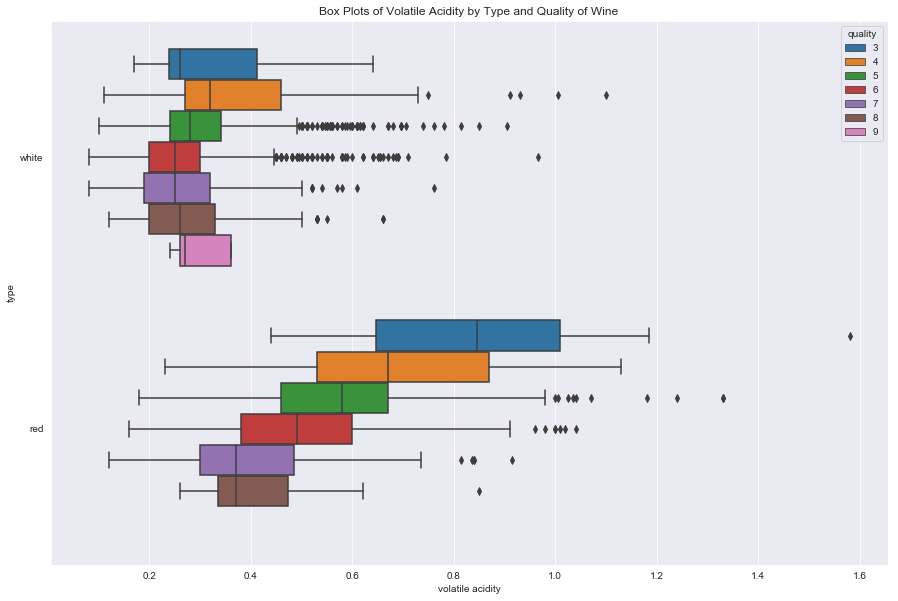

In [31]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=wine, x='volatile acidity', y='type', hue='quality');
plt.title('Box Plots of Volatile Acidity by Type and Quality of Wine');

The box plots above are "busy", but are meant to be an example of segmenting by both a categorical feature (wine type) and a discrete numeric feature (wine quality). Be careful how you apply a discrete numeric feature for segmenting, as Seaborn may assume it's continuous and not display it properly.

According to these box plots, it seems that the red wine observations tend to have higher volatile acidity than their white wine counterparts. The white wine observations are also more concentrated within a tighter range (aka there's less variability). The segmenting by wine quality shows that acidity doesn't seem to influence the wine quality for white wines, but there is a trend in the red wines where the lower-quality wines tend to have higher volatile acidity levels.

Running the same plot with the fixed acidity feature shows similar results, although with slightly more overlap. One potential feature engineering task would be to combine the fixed and volatile acidity features into one for total acidity. This is a trend you can confirm by looking at bivariate and correlation plots of these two variables.

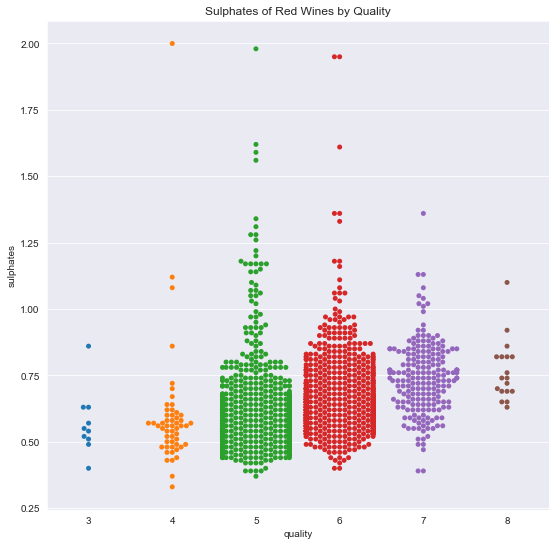

In [37]:
plt.figure(figsize=(9, 9))
sns.swarmplot(data=wine[wine['type'] == 'red'], x='quality', y='sulphates');
plt.title('Sulphates of Red Wines by Quality');

Beeswarm plots are useful when you want to see every data point plotted, but can lose that utility when you have a large number of observations. Applying these plots to a subset of your data can aid in their readability - this plot shows the distribution of sulphate values for red wine only.

## Wine Quality Data Citations

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier](http://dx.doi.org/10.1016/j.dss.2009.05.016)
                [Pre-press (pdf)](http://www3.dsi.uminho.pt/pcortez/winequality09.pdf)
                [bib](http://www3.dsi.uminho.pt/pcortez/dss09.bib)

1. Title: Wine Quality

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).

4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are much more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods.

5. Number of Instances: red wine - 1599; white wine - 4898.

6. Number of Attributes: 11 + output attribute

   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data):
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None